# Training and Parameter Tuning

In [1]:
import pandas as pd
import numpy as np
import random 
import gym
from trd_env import trading_env

In [2]:
train = pd.read_csv("btc_6H_(2016-2018).csv")
env = trading_env(train)
env.reset()

array([0.45, 0.5 , 0.  , 0.5 ])

In [3]:
obs_state = []
for i in set(train["3D_return_norm"]):
    for m in set(train["MACD_status"]):
        for r in set(train["RSI_status"]):
            for e in set(train["RSI_status"]):
                obs_state.append(np.array([i,m,r,e]))
# set() takes unique values

In [4]:
# Actions
q_table = {}
for i in obs_state:
    q_table[f"{i}"]=[0,0,0]
print(q_table)

{'[0.45 0.5  0.   0.  ]': [0, 0, 0], '[0.45 0.5  0.   0.5 ]': [0, 0, 0], '[0.45 0.5  0.   1.  ]': [0, 0, 0], '[0.45 0.5  0.5  0.  ]': [0, 0, 0], '[0.45 0.5  0.5  0.5 ]': [0, 0, 0], '[0.45 0.5  0.5  1.  ]': [0, 0, 0], '[0.45 0.5  1.   0.  ]': [0, 0, 0], '[0.45 0.5  1.   0.5 ]': [0, 0, 0], '[0.45 0.5  1.   1.  ]': [0, 0, 0], '[0.45 1.   0.   0.  ]': [0, 0, 0], '[0.45 1.   0.   0.5 ]': [0, 0, 0], '[0.45 1.   0.   1.  ]': [0, 0, 0], '[0.45 1.   0.5  0.  ]': [0, 0, 0], '[0.45 1.   0.5  0.5 ]': [0, 0, 0], '[0.45 1.   0.5  1.  ]': [0, 0, 0], '[0.45 1.   1.   0.  ]': [0, 0, 0], '[0.45 1.   1.   0.5 ]': [0, 0, 0], '[0.45 1.   1.   1.  ]': [0, 0, 0], '[0.45 0.   0.   0.  ]': [0, 0, 0], '[0.45 0.   0.   0.5 ]': [0, 0, 0], '[0.45 0.   0.   1.  ]': [0, 0, 0], '[0.45 0.   0.5  0.  ]': [0, 0, 0], '[0.45 0.   0.5  0.5 ]': [0, 0, 0], '[0.45 0.   0.5  1.  ]': [0, 0, 0], '[0.45 0.   1.   0.  ]': [0, 0, 0], '[0.45 0.   1.   0.5 ]': [0, 0, 0], '[0.45 0.   1.   1.  ]': [0, 0, 0], '[0.47 0.5  0.   0.  ]': [0

In [9]:
# Q-learning parameters
epsilon = 0.98
max_epsilon = 1
min_epsilon = 0.1
decay_rate = 0.01
l_r = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
gamma = 0.96 # discount factor

total_episodes = 10
max_steps = len(train)-1

In [10]:
#Parameter Search
total_reward = []
total_reward_perc =[]
total_bought = []
total_sold = []
learning_rate_list = []

for learning_rate in l_r:
    for episode in range(total_episodes):
        env.reset()
        current_state = env.observation()
        print(f"Current Episode: {episode}")
        total_steps = 0
        current_reward = []
        for step in range(max_steps):
            exp = random.uniform(0,1)
            if exp > epsilon:
                action = np.argmax(q_table[f"{current_state}"])
            else:
                action = np.random.choice([0,1,2])

            new_state, reward, done = env.step(action)

            q_table[f"{current_state}"][action] = (1 - learning_rate) * q_table[f"{current_state}"][action]\
                + learning_rate * (reward + gamma * np.max(q_table[f"{new_state}"]))


            current_state = new_state
            total_steps+= 1
            if done == True:
                break
            epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode) 

        print(env.render())
        return_perc,return_value,bought,sold,x = env.reward_output()
        total_reward.append(return_value)
        total_reward_perc.append(return_perc)
        total_bought.append(bought)
        total_sold.append(sold)
        learning_rate_list.append((learning_rate, return_value))

Current Episode: 0
Current Porfolio Value:33889.872114011116; Available Capital: 19831.225584421685; Current Stocks Held: 3.9768736557518385
No. Stocks Bought:341.5017269150436; No. Stocks Sold:337.52485434929156; Average Cost:3739.0309586689614 
Return:238.89872114011115%; 23889.872114011116
Termination date: 2018-12-09 18:00:00
None
Current Episode: 1
Current Porfolio Value:32131.820503386116; Available Capital: 17827.011314759384; Current Stocks Held: 4.051876342520673
No. Stocks Bought:286.6676019326703; No. Stocks Sold:282.61572668014946; Average Cost:3647.149000340112 
Return:221.31820503386118%; 22131.820503386116
Termination date: 2018-12-09 18:00:00
None
Current Episode: 2
Current Porfolio Value:25423.124778836027; Available Capital: 6698.026056349756; Current Stocks Held: 5.271783729127083
No. Stocks Bought:248.00060163079354; No. Stocks Sold:242.72881899166657; Average Cost:3611.0280910002766 
Return:154.23124778836026%; 15423.124778836027
Termination date: 2018-12-09 18:00:

Current Porfolio Value:36066.22410405289; Available Capital: 17319.505036126102; Current Stocks Held: 5.277836626108918
No. Stocks Bought:351.571468545635; No. Stocks Sold:346.29363300952633; Average Cost:3648.337514604999 
Return:260.6622410405289%; 26066.22410405289
Termination date: 2018-12-09 18:00:00
None
Current Episode: 6
Current Porfolio Value:21439.60633935075; Available Capital: 12260.299147675765; Current Stocks Held: 2.5941948223821374
No. Stocks Bought:263.37190787032955; No. Stocks Sold:260.7777141379476; Average Cost:3686.514016545877 
Return:114.39606339350749%; 11439.60633935075
Termination date: 2018-12-09 18:00:00
None
Current Episode: 7
Current Porfolio Value:22127.894811598046; Available Capital: 14592.745968405485; Current Stocks Held: 2.123801479508024
No. Stocks Bought:294.3211450573991; No. Stocks Sold:292.197344667891; Average Cost:3839.0955277222934 
Return:121.27894811598046%; 12127.894811598046
Termination date: 2018-12-09 18:00:00
None
Current Episode: 8
C

Current Porfolio Value:29675.825225291483; Available Capital: 15956.015593676697; Current Stocks Held: 3.883060118227215
No. Stocks Bought:288.5065133891377; No. Stocks Sold:284.623454360911; Average Cost:3561.997869373649 
Return:196.75825225291484%; 19675.825225291483
Termination date: 2018-12-09 18:00:00
None
Current Episode: 2
Current Porfolio Value:37692.58885954218; Available Capital: 22706.618151481165; Current Stocks Held: 4.2284376544860285
No. Stocks Bought:320.9883312034371; No. Stocks Sold:316.7598946389505; Average Cost:3556.9366062798267 
Return:276.9258885954218%; 27692.58885954218
Termination date: 2018-12-09 18:00:00
None
Current Episode: 3
Current Porfolio Value:33893.4559445888; Available Capital: 15199.113953197277; Current Stocks Held: 5.26845203190737
No. Stocks Bought:289.89449059219083; No. Stocks Sold:284.6260396502837; Average Cost:3561.5649581970306 
Return:238.934559445888%; 23893.4559445888
Termination date: 2018-12-09 18:00:00
None
Current Episode: 4
Curre

Current Porfolio Value:33640.50080648791; Available Capital: 15831.443336394934; Current Stocks Held: 5.021336545875626
No. Stocks Bought:335.3064869315377; No. Stocks Sold:330.2851514756625; Average Cost:3644.0287324547867 
Return:236.4050080648791%; 23640.500806487908
Termination date: 2018-12-09 18:00:00
None
Current Episode: 7
Current Porfolio Value:27342.330329453725; Available Capital: 15521.769346056712; Current Stocks Held: 3.324264714941864
No. Stocks Bought:264.24664206579115; No. Stocks Sold:260.92237844084923; Average Cost:3537.834971183395 
Return:173.42330329453725%; 17342.330329453725
Termination date: 2018-12-09 18:00:00
None
Current Episode: 8
Current Porfolio Value:31625.163654379212; Available Capital: 23768.933858668534; Current Stocks Held: 2.2206511953387116
No. Stocks Bought:302.8612799404259; No. Stocks Sold:300.64062983508717; Average Cost:3502.5379157311195 
Return:216.25163654379213%; 21625.163654379212
Termination date: 2018-12-09 18:00:00
None
Current Episo

In [11]:
x = np.where(learning_rate_list == np.amax(learning_rate_list))
optimal_lr = learning_rate_list[int(x[0])]
print(optimal_lr)
# Learning rate with the highest return

(0.7, 41483.403496861356)


In [12]:
test = pd.read_csv("btc_6H_(2020-2021).csv")
env = trading_env(test)
env.reset()

array([0.4, 0.5, 0.5, 0.5])

In [13]:
obs_state = []
for i in set(test["3D_return_norm"]):
    for m in set(test["MACD_status"]):
        for r in set(test["RSI_status"]):
            for e in set(test["RSI_status"]):
                obs_state.append(np.array([i,m,r,e]))
# set() takes unique values

In [14]:
# Actions
q_table1 = {}
for i in obs_state:
    q_table1[f"{i}"]=[0,0,0]

print(q_table1)

{'[0.4 0.5 0.5 0.5]': [0, 0, 0], '[0.4 0.5 0.5 1. ]': [0, 0, 0], '[0.4 0.5 0.5 0. ]': [0, 0, 0], '[0.4 0.5 1.  0.5]': [0, 0, 0], '[0.4 0.5 1.  1. ]': [0, 0, 0], '[0.4 0.5 1.  0. ]': [0, 0, 0], '[0.4 0.5 0.  0.5]': [0, 0, 0], '[0.4 0.5 0.  1. ]': [0, 0, 0], '[0.4 0.5 0.  0. ]': [0, 0, 0], '[0.4 1.  0.5 0.5]': [0, 0, 0], '[0.4 1.  0.5 1. ]': [0, 0, 0], '[0.4 1.  0.5 0. ]': [0, 0, 0], '[0.4 1.  1.  0.5]': [0, 0, 0], '[0.4 1.  1.  1. ]': [0, 0, 0], '[0.4 1.  1.  0. ]': [0, 0, 0], '[0.4 1.  0.  0.5]': [0, 0, 0], '[0.4 1.  0.  1. ]': [0, 0, 0], '[0.4 1.  0.  0. ]': [0, 0, 0], '[0.4 0.  0.5 0.5]': [0, 0, 0], '[0.4 0.  0.5 1. ]': [0, 0, 0], '[0.4 0.  0.5 0. ]': [0, 0, 0], '[0.4 0.  1.  0.5]': [0, 0, 0], '[0.4 0.  1.  1. ]': [0, 0, 0], '[0.4 0.  1.  0. ]': [0, 0, 0], '[0.4 0.  0.  0.5]': [0, 0, 0], '[0.4 0.  0.  1. ]': [0, 0, 0], '[0.4 0.  0.  0. ]': [0, 0, 0], '[0.47 0.5  0.5  0.5 ]': [0, 0, 0], '[0.47 0.5  0.5  1.  ]': [0, 0, 0], '[0.47 0.5  0.5  0.  ]': [0, 0, 0], '[0.47 0.5  1.   0.5 ]': [0

In [15]:
# Q-learning parameters
epsilon = 0.98
max_epsilon = 1
min_epsilon = 0.1
decay_rate = 0.01
learning_rate = 0.5
gamma = 0.96 # discount factor

total_episodes = 1000
max_steps = len(test)-1

In [16]:
#Training on Test Set
total_reward = []
total_reward_percc =[]
total_bought = []
total_sold = []


for episode in range(total_episodes):
    env.reset()
    current_state = env.observation()
    print(f"Current Episode: {episode}")
    total_steps = 0
    current_reward = []
    for step in range(max_steps):
        exp = random.uniform(0,1)
        if exp > epsilon:
            action = np.argmax(q_table1[f"{current_state}"])
        else:
            action = np.random.choice([0,1,2])

        new_state, reward, done = env.step(action)
        q_table1[f"{current_state}"][action] = (1 - learning_rate) * q_table1[f"{current_state}"][action]\
            + learning_rate * (reward + gamma * np.max(q_table1[f"{new_state}"]))


        current_state = new_state
        total_steps+= 1
        if done == True:
            break
        epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode) 

    print(env.render())
    return_perc,return_value,bought,sold,current = env.reward_output()
    total_reward.append(return_value)
    total_reward_percc.append(return_perc)
    total_bought.append(bought)
    total_sold.append(sold)

Current Episode: 0
Current Porfolio Value:18308.84823081395; Available Capital: 9504.530354922608; Current Stocks Held: 0.30444531891344684
No. Stocks Bought:10.793052603659186; No. Stocks Sold:10.488608374745734; Average Cost:25977.02988741209 
Return:83.0884823081395%; 8308.84823081395
Termination date: 2020-12-31 00:00:00
None
Current Episode: 1
Current Porfolio Value:19037.019046651374; Available Capital: 8591.871717507596; Current Stocks Held: 0.3612988497316852
No. Stocks Bought:10.336926486801541; No. Stocks Sold:9.975628727069854; Average Cost:23363.91556541239 
Return:90.37019046651375%; 9037.019046651374
Termination date: 2020-12-31 00:00:00
None
Current Episode: 2
Current Porfolio Value:18304.688561692958; Available Capital: 7986.623364520847; Current Stocks Held: 0.35682872340967253
No. Stocks Bought:10.338849998227909; No. Stocks Sold:9.982022364818238; Average Cost:22687.48809389015 
Return:83.04688561692957%; 8304.688561692958
Termination date: 2020-12-31 00:00:00
None
C

Current Porfolio Value:23861.0206222239; Available Capital: 3507.9516287970723; Current Stocks Held: 0.7042783309662342
No. Stocks Bought:12.699406782245257; No. Stocks Sold:11.995129541279018; Average Cost:22887.310192274464 
Return:138.610206222239%; 13861.0206222239
Termination date: 2020-12-31 00:00:00
None
Current Episode: 26
Current Porfolio Value:19212.265905214063; Available Capital: 3763.9017014654564; Current Stocks Held: 0.5343173246482348
No. Stocks Bought:12.22400096891513; No. Stocks Sold:11.6896847342669; Average Cost:23240.93082388748 
Return:92.12265905214062%; 9212.265905214063
Termination date: 2020-12-31 00:00:00
None
Current Episode: 27
Current Porfolio Value:22650.698302700563; Available Capital: 13541.098622675716; Current Stocks Held: 0.3151595024035066
No. Stocks Bought:12.702924808849458; No. Stocks Sold:12.387766396445945; Average Cost:22533.6238975767 
Return:126.50698302700563%; 12650.698302700563
Termination date: 2020-12-31 00:00:00
None
Current Episode: 

Current Porfolio Value:27781.4292055346; Available Capital: 16662.106665795985; Current Stocks Held: 0.38480751365572746
No. Stocks Bought:13.404485460222086; No. Stocks Sold:13.01967903656636; Average Cost:24092.939418109105 
Return:177.81429205534602%; 17781.4292055346
Termination date: 2020-12-31 00:00:00
None
Current Episode: 51
Current Porfolio Value:19379.20664077554; Available Capital: 8923.912180240926; Current Stocks Held: 0.36180337639787025
No. Stocks Bought:11.435723554739784; No. Stocks Sold:11.073921268341921; Average Cost:23926.43730849503 
Return:93.79206640775541%; 9379.206640775541
Termination date: 2020-12-31 00:00:00
None
Current Episode: 52
Current Porfolio Value:20815.28968123129; Available Capital: 15637.014805553463; Current Stocks Held: 0.17917258887687462
No. Stocks Bought:11.726886808050711; No. Stocks Sold:11.54771530917384; Average Cost:21964.560364341844 
Return:108.1528968123129%; 10815.28968123129
Termination date: 2020-12-31 00:00:00
None
Current Episod

Current Porfolio Value:22668.809680648745; Available Capital: 5667.618613263798; Current Stocks Held: 0.5883487769352083
No. Stocks Bought:12.601965446053228; No. Stocks Sold:12.013617759118022; Average Cost:23654.49236049486 
Return:126.68809680648745%; 12668.809680648745
Termination date: 2020-12-31 00:00:00
None
Current Episode: 76
Current Porfolio Value:20857.214233912637; Available Capital: 13061.841816158907; Current Stocks Held: 0.26968288291570036
No. Stocks Bought:11.954656269605499; No. Stocks Sold:11.684974476689789; Average Cost:24358.958794086993 
Return:108.57214233912637%; 10857.214233912637
Termination date: 2020-12-31 00:00:00
None
Current Episode: 77
Current Porfolio Value:20891.220470587337; Available Capital: 2405.1253487711115; Current Stocks Held: 0.639151542263443
No. Stocks Bought:12.018741755700841; No. Stocks Sold:11.379591303437394; Average Cost:23066.10385655954 
Return:108.91220470587338%; 10891.220470587337
Termination date: 2020-12-31 00:00:00
None
Curren

Current Porfolio Value:17164.627893463283; Available Capital: 12959.425469930595; Current Stocks Held: 0.14546771929393087
No. Stocks Bought:11.23074828695241; No. Stocks Sold:11.085281657658472; Average Cost:24522.193321332208 
Return:71.64627893463282%; 7164.627893463283
Termination date: 2020-12-31 00:00:00
None
Current Episode: 101
Current Porfolio Value:22563.48098182874; Available Capital: 12127.894891971911; Current Stocks Held: 0.3610833901172175
No. Stocks Bought:14.253228723419278; No. Stocks Sold:13.89214642330207; Average Cost:25085.081267630518 
Return:125.63480981828738%; 12563.48098182874
Termination date: 2020-12-31 00:00:00
None
Current Episode: 102
Current Porfolio Value:26556.920242496515; Available Capital: 14309.395308278883; Current Stocks Held: 0.42367509251434526
No. Stocks Bought:12.473530605386935; No. Stocks Sold:12.049856602872586; Average Cost:22090.036541476893 
Return:165.56920242496517%; 16556.920242496515
Termination date: 2020-12-31 00:00:00
None
Curre

Current Porfolio Value:24681.06614069266; Available Capital: 13616.704187751284; Current Stocks Held: 0.38264378379979036
No. Stocks Bought:13.623438666811001; No. Stocks Sold:13.240795973011204; Average Cost:22790.427572409553 
Return:146.8106614069266%; 14681.06614069266
Termination date: 2020-12-31 00:00:00
None
Current Episode: 126
Current Porfolio Value:20998.51517878086; Available Capital: 13761.43039918739; Current Stocks Held: 0.2502988551732979
No. Stocks Bought:13.343058057499622; No. Stocks Sold:13.092760292326323; Average Cost:24912.114855217358 
Return:109.9851517878086%; 10998.51517878086
Termination date: 2020-12-31 00:00:00
None
Current Episode: 127
Current Porfolio Value:28883.863612612717; Available Capital: 14425.761873868927; Current Stocks Held: 0.4999843601495337
No. Stocks Bought:15.791750093698067; No. Stocks Sold:15.291766823548533; Average Cost:22418.326615303158 
Return:188.83863612612717%; 18883.863612612717
Termination date: 2020-12-31 00:00:00
None
Current

Current Porfolio Value:27704.732488201593; Available Capital: 9242.149532768592; Current Stocks Held: 0.6382686130612159
No. Stocks Bought:16.79295708403351; No. Stocks Sold:16.154689560972297; Average Cost:24568.779484313352 
Return:177.04732488201594%; 17704.732488201593
Termination date: 2020-12-31 00:00:00
None
Current Episode: 152
Current Porfolio Value:18920.71080220399; Available Capital: 12549.892036864332; Current Stocks Held: 0.22023825812057735
No. Stocks Bought:12.229770957588425; No. Stocks Sold:12.009533789467849; Average Cost:24933.14336858611 
Return:89.2071080220399%; 8920.71080220399
Termination date: 2020-12-31 00:00:00
None
Current Episode: 153
Current Porfolio Value:23352.54043119294; Available Capital: 20472.12945065316; Current Stocks Held: 0.09957294528189714
No. Stocks Bought:13.399030841846844; No. Stocks Sold:13.299458986564943; Average Cost:22450.070996886298 
Return:133.5254043119294%; 13352.540431192941
Termination date: 2020-12-31 00:00:00
None
Current Ep

Current Porfolio Value:19299.707220013726; Available Capital: 9476.957860404054; Current Stocks Held: 0.339640555128477
No. Stocks Bought:14.296239168886341; No. Stocks Sold:13.956599703757849; Average Cost:25079.266418912444 
Return:92.99707220013727%; 9299.707220013726
Termination date: 2020-12-31 00:00:00
None
Current Episode: 177
Current Porfolio Value:19055.878573328104; Available Capital: 10108.630899954886; Current Stocks Held: 0.3096056320694273
No. Stocks Bought:11.695857731776883; No. Stocks Sold:11.386253189707446; Average Cost:21611.38959913138 
Return:90.55878573328103%; 9055.878573328104
Termination date: 2020-12-31 00:00:00
None
Current Episode: 178
Current Porfolio Value:24862.90501864347; Available Capital: 13459.291565902215; Current Stocks Held: 0.3942091923593378
No. Stocks Bought:16.115748947658176; No. Stocks Sold:15.721540845298831; Average Cost:23812.83507474497 
Return:148.62905018643468%; 14862.905018643469
Termination date: 2020-12-31 00:00:00
None
Current Ep

Current Porfolio Value:22701.629689723377; Available Capital: 11796.225055693205; Current Stocks Held: 0.3772579406922999
No. Stocks Bought:13.302772467624576; No. Stocks Sold:12.92551561693229; Average Cost:24098.676484366046 
Return:127.01629689723377%; 12701.629689723377
Termination date: 2020-12-31 00:00:00
None
Current Episode: 203
Current Porfolio Value:20933.99199282168; Available Capital: 10691.82234590673; Current Stocks Held: 0.35422867222133236
No. Stocks Bought:12.516027547266669; No. Stocks Sold:12.161799965045327; Average Cost:24478.883657245857 
Return:109.33991992821682%; 10933.99199282168
Termination date: 2020-12-31 00:00:00
None
Current Episode: 204
Current Porfolio Value:18034.098599673784; Available Capital: 10715.239137204639; Current Stocks Held: 0.2530799936932978
No. Stocks Bought:14.007003618930327; No. Stocks Sold:13.753924715237037; Average Cost:24942.537652407216 
Return:80.34098599673783%; 8034.098599673784
Termination date: 2020-12-31 00:00:00
None
Curren

Current Porfolio Value:26421.74426993064; Available Capital: 5167.505204634894; Current Stocks Held: 0.7349638791320136
No. Stocks Bought:14.064717833747723; No. Stocks Sold:13.329755044615712; Average Cost:22226.66153563645 
Return:164.21744269930642%; 16421.74426993064
Termination date: 2020-12-31 00:00:00
None
Current Episode: 227
Current Porfolio Value:28816.274383746728; Available Capital: 13495.384426813804; Current Stocks Held: 0.5301624100694069
No. Stocks Bought:17.386568379316095; No. Stocks Sold:16.856407059246703; Average Cost:23680.151013567593 
Return:188.16274383746727%; 18816.274383746728
Termination date: 2020-12-31 00:00:00
None
Current Episode: 228
Current Porfolio Value:30176.015821830588; Available Capital: 12396.62487438949; Current Stocks Held: 0.6148213266942839
No. Stocks Bought:16.721709028111125; No. Stocks Sold:16.106888791416843; Average Cost:24793.38270821332 
Return:201.76015821830586%; 20176.015821830588
Termination date: 2020-12-31 00:00:00
None
Current

Current Porfolio Value:17701.958433924094; Available Capital: 13358.272320033237; Current Stocks Held: 0.1501909732284159
No. Stocks Bought:14.831044879896456; No. Stocks Sold:14.680854996668034; Average Cost:25569.49137779944 
Return:77.01958433924094%; 7701.958433924094
Termination date: 2020-12-31 00:00:00
None
Current Episode: 252
Current Porfolio Value:18277.147918006576; Available Capital: 14209.170572863684; Current Stocks Held: 0.14077317988551952
No. Stocks Bought:12.757922673364506; No. Stocks Sold:12.617150583478988; Average Cost:24030.75134749648 
Return:82.77147918006577%; 8277.147918006576
Termination date: 2020-12-31 00:00:00
None
Current Episode: 253
Current Porfolio Value:19375.771939208636; Available Capital: 5165.609079241187; Current Stocks Held: 0.4914736038707354
No. Stocks Bought:12.857263142052751; No. Stocks Sold:12.365790628182008; Average Cost:22122.09704944219 
Return:93.75771939208637%; 9375.771939208636
Termination date: 2020-12-31 00:00:00
None
Current Ep

Current Porfolio Value:24495.56974901379; Available Capital: 8356.574825052212; Current Stocks Held: 0.55838170952906
No. Stocks Bought:13.334682705988838; No. Stocks Sold:12.776302086459774; Average Cost:24344.797300424056 
Return:144.9556974901379%; 14495.56974901379
Termination date: 2020-12-31 00:00:00
None
Current Episode: 280
Current Porfolio Value:25472.658837952004; Available Capital: 16070.312310835161; Current Stocks Held: 0.3250784147110528
No. Stocks Bought:13.065602094200933; No. Stocks Sold:12.740524769489872; Average Cost:25496.904927886753 
Return:154.72658837952002%; 15472.658837952004
Termination date: 2020-12-31 00:00:00
None
Current Episode: 281
Current Porfolio Value:23058.518240456124; Available Capital: 20058.37760590641; Current Stocks Held: 0.10374734551782305
No. Stocks Bought:14.535809377744062; No. Stocks Sold:14.432063122226243; Average Cost:23772.355391115878 
Return:130.58518240456124%; 13058.518240456124
Termination date: 2020-12-31 00:00:00
None
Current

Current Porfolio Value:26308.24011984988; Available Capital: 8575.193009533108; Current Stocks Held: 0.6131909453597841
No. Stocks Bought:15.168570817387394; No. Stocks Sold:14.5553809620276; Average Cost:23650.09216483247 
Return:163.08240119849881%; 16308.240119849881
Termination date: 2020-12-31 00:00:00
None
Current Episode: 304
Current Porfolio Value:25742.61816926059; Available Capital: 11525.645046509704; Current Stocks Held: 0.4915310996990724
No. Stocks Bought:16.502712289240023; No. Stocks Sold:16.011182279540918; Average Cost:22295.583243374873 
Return:157.4261816926059%; 15742.61816926059
Termination date: 2020-12-31 00:00:00
None
Current Episode: 305
Current Porfolio Value:16754.577037679926; Available Capital: 11056.617446715263; Current Stocks Held: 0.19706869017849182
No. Stocks Bought:13.09021497470791; No. Stocks Sold:12.893147374529422; Average Cost:24396.37382195632 
Return:67.54577037679927%; 6754.577037679926
Termination date: 2020-12-31 00:00:00
None
Current Epis

Current Porfolio Value:22166.492884035026; Available Capital: 7045.784964667587; Current Stocks Held: 0.522832851152036
No. Stocks Bought:15.419702048816136; No. Stocks Sold:14.896870287664097; Average Cost:24338.222149791163 
Return:121.66492884035026%; 12166.492884035026
Termination date: 2020-12-31 00:00:00
None
Current Episode: 328
Current Porfolio Value:23345.68068154924; Available Capital: 13715.80158457418; Current Stocks Held: 0.3328958826588464
No. Stocks Bought:14.942383448749842; No. Stocks Sold:14.609488656090997; Average Cost:22680.201661748913 
Return:133.4568068154924%; 13345.680681549238
Termination date: 2020-12-31 00:00:00
None
Current Episode: 329
Current Porfolio Value:35696.53145018654; Available Capital: 543.4413577892633; Current Stocks Held: 1.2163720858809006
No. Stocks Bought:14.618565503094192; No. Stocks Sold:13.402194507213284; Average Cost:20154.313781646943 
Return:256.9653145018654%; 25696.531450186543
Termination date: 2020-12-31 00:00:00
None
Current E

Current Porfolio Value:18551.291579544188; Available Capital: 6952.9672071039295; Current Stocks Held: 0.4009370701282948
No. Stocks Bought:15.30174680332064; No. Stocks Sold:14.900810823192348; Average Cost:24310.541952802174 
Return:85.51291579544188%; 8551.291579544188
Termination date: 2020-12-31 00:00:00
None
Current Episode: 355
Current Porfolio Value:19140.49555967789; Available Capital: 14507.016718710696; Current Stocks Held: 0.16017147953011676
No. Stocks Bought:16.55205582368683; No. Stocks Sold:16.391885434156702; Average Cost:25997.118738927693 
Return:91.40495559677889%; 9140.49555967789
Termination date: 2020-12-31 00:00:00
None
Current Episode: 356
Current Porfolio Value:15432.573162873727; Available Capital: 8234.270591851177; Current Stocks Held: 0.24894510597422298
No. Stocks Bought:12.721624173495039; No. Stocks Sold:12.472680157520815; Average Cost:25876.62365431026 
Return:54.32573162873726%; 5432.573162873727
Termination date: 2020-12-31 00:00:00
None
Current Epi

Current Porfolio Value:25098.808803819677; Available Capital: 8596.639556948903; Current Stocks Held: 0.570509259694107
No. Stocks Bought:14.55213026002296; No. Stocks Sold:13.981622090328852; Average Cost:23570.597677163285 
Return:150.98808803819676%; 15098.808803819677
Termination date: 2020-12-31 00:00:00
None
Current Episode: 380
Current Porfolio Value:19769.368253860273; Available Capital: 7170.043501278252; Current Stocks Held: 0.435999860370204
No. Stocks Bought:15.993236979446008; No. Stocks Sold:15.557238209075802; Average Cost:24514.772085486795 
Return:97.69368253860273%; 9769.368253860273
Termination date: 2020-12-31 00:00:00
None
Current Episode: 381
Current Porfolio Value:15269.191203513046; Available Capital: 6206.231174192049; Current Stocks Held: 0.3133355727952861
No. Stocks Bought:11.642234689300922; No. Stocks Sold:11.328900206505642; Average Cost:24855.34750268378 
Return:52.691912035130464%; 5269.191203513046
Termination date: 2020-12-31 00:00:00
None
Current Epi

Current Porfolio Value:33994.84322384161; Available Capital: 15760.717791285671; Current Stocks Held: 0.6309103294479216
No. Stocks Bought:14.512509505020244; No. Stocks Sold:13.881600265572317; Average Cost:24267.808500754076 
Return:239.94843223841613%; 23994.843223841614
Termination date: 2020-12-31 00:00:00
None
Current Episode: 405
Current Porfolio Value:28095.963592570202; Available Capital: 12593.3066077724; Current Stocks Held: 0.5363339746268291
No. Stocks Bought:14.051629220186879; No. Stocks Sold:13.515296335560063; Average Cost:24491.084861058982 
Return:180.95963592570203%; 18095.963592570202
Termination date: 2020-12-31 00:00:00
None
Current Episode: 406
Current Porfolio Value:22311.368407044585; Available Capital: 17586.592916776306; Current Stocks Held: 0.163422136494006
No. Stocks Bought:14.729031952302943; No. Stocks Sold:14.565610905808935; Average Cost:23717.111095084503 
Return:123.11368407044586%; 12311.368407044585
Termination date: 2020-12-31 00:00:00
None
Curre

Current Porfolio Value:17677.649730899626; Available Capital: 12894.96552118484; Current Stocks Held: 0.16536127262829775
No. Stocks Bought:12.614422332134598; No. Stocks Sold:12.44906214950631; Average Cost:24897.098844023236 
Return:76.77649730899626%; 7677.649730899626
Termination date: 2020-12-31 00:00:00
None
Current Episode: 430
Current Porfolio Value:16398.52251367525; Available Capital: 11104.09562792748; Current Stocks Held: 0.18307732184584055
No. Stocks Bought:11.891640379828257; No. Stocks Sold:11.708564147982408; Average Cost:24970.086168724833 
Return:63.98522513675249%; 6398.522513675249
Termination date: 2020-12-31 00:00:00
None
Current Episode: 431
Current Porfolio Value:28011.468380903323; Available Capital: 14483.752493409933; Current Stocks Held: 0.4676737742884044
No. Stocks Bought:16.64497139522324; No. Stocks Sold:16.177298710934842; Average Cost:24690.33687427515 
Return:180.11468380903324%; 18011.468380903323
Termination date: 2020-12-31 00:00:00
None
Current E

Current Porfolio Value:25538.326894340105; Available Capital: 15067.507416139633; Current Stocks Held: 0.3621248027590881
No. Stocks Bought:16.419944607926475; No. Stocks Sold:16.057820895167392; Average Cost:24319.921738723377 
Return:155.38326894340105%; 15538.326894340105
Termination date: 2020-12-31 00:00:00
None
Current Episode: 456
Current Porfolio Value:20263.318398107564; Available Capital: 10900.774434022576; Current Stocks Held: 0.32374610862643904
No. Stocks Bought:14.267048035057554; No. Stocks Sold:13.943303016431118; Average Cost:25235.892947040342 
Return:102.63318398107563%; 10263.318398107564
Termination date: 2020-12-31 00:00:00
None
Current Episode: 457
Current Porfolio Value:18697.406987167065; Available Capital: 8238.76830695129; Current Stocks Held: 0.36157261465774276
No. Stocks Bought:12.987580589523262; No. Stocks Sold:12.626009064865517; Average Cost:24992.771565186205 
Return:86.97406987167065%; 8697.406987167065
Termination date: 2020-12-31 00:00:00
None
Cur

Current Porfolio Value:26676.703832270592; Available Capital: 16256.281184032381; Current Stocks Held: 0.36032758578528906
No. Stocks Bought:16.63843043735349; No. Stocks Sold:16.278103941568205; Average Cost:24178.522886521918 
Return:166.76703832270593%; 16676.703832270592
Termination date: 2020-12-31 00:00:00
None
Current Episode: 481
Current Porfolio Value:18657.52885176106; Available Capital: 7360.303769271934; Current Stocks Held: 0.39080767365885694
No. Stocks Bought:14.539711532938552; No. Stocks Sold:14.148904949279684; Average Cost:24307.002644439886 
Return:86.5752885176106%; 8657.52885176106
Termination date: 2020-12-31 00:00:00
None
Current Episode: 482
Current Porfolio Value:23384.341008585776; Available Capital: 14601.215284585322; Current Stocks Held: 0.3038127304207531
No. Stocks Bought:15.32676490310857; No. Stocks Sold:15.022953262687825; Average Cost:24112.138385483944 
Return:133.84341008585776%; 13384.341008585776
Termination date: 2020-12-31 00:00:00
None
Current

Current Porfolio Value:28456.762128695227; Available Capital: 7602.083558197153; Current Stocks Held: 0.7214771606050561
No. Stocks Bought:15.346067638026222; No. Stocks Sold:14.624591567421179; Average Cost:23110.474030962007 
Return:184.5676212869523%; 18456.762128695227
Termination date: 2020-12-31 00:00:00
None
Current Episode: 506
Current Porfolio Value:25048.16914402887; Available Capital: 22624.10394701571; Current Stocks Held: 0.08381465983157857
No. Stocks Bought:15.813586259028911; No. Stocks Sold:15.729772689197334; Average Cost:22311.178095545292 
Return:150.4816914402887%; 15048.16914402887
Termination date: 2020-12-31 00:00:00
None
Current Episode: 507
Current Porfolio Value:19818.842056537003; Available Capital: 15318.976641164596; Current Stocks Held: 0.1557364937046475
No. Stocks Bought:14.516003078375256; No. Stocks Sold:14.360267674670606; Average Cost:25112.568931404003 
Return:98.18842056537004%; 9818.842056537003
Termination date: 2020-12-31 00:00:00
None
Current 

Current Porfolio Value:25412.9885330493; Available Capital: 7428.426557160703; Current Stocks Held: 0.6222045032429837
No. Stocks Bought:16.848593934799958; No. Stocks Sold:16.226390521556983; Average Cost:24116.35673787809 
Return:154.129885330493%; 15412.988533049302
Termination date: 2020-12-31 00:00:00
None
Current Episode: 530
Current Porfolio Value:23158.15932098873; Available Capital: 2567.6326101136797; Current Stocks Held: 0.712524353240138
No. Stocks Bought:15.794801671484546; No. Stocks Sold:15.082278408244413; Average Cost:22427.18259555798 
Return:131.5815932098873%; 13158.159320988729
Termination date: 2020-12-31 00:00:00
None
Current Episode: 531
Current Porfolio Value:32334.166880873116; Available Capital: 16221.75424833474; Current Stocks Held: 0.5573380500152282
No. Stocks Bought:18.636631783825674; No. Stocks Sold:18.079294823810443; Average Cost:24991.580303043134 
Return:223.34166880873116%; 22334.166880873116
Termination date: 2020-12-31 00:00:00
None
Current Epis

Current Porfolio Value:22010.11438621278; Available Capital: 5150.315294649671; Current Stocks Held: 0.5833965273976204
No. Stocks Bought:13.472475146531067; No. Stocks Sold:12.889079709133439; Average Cost:24814.6627142027 
Return:120.1011438621278%; 12010.11438621278
Termination date: 2020-12-31 00:00:00
None
Current Episode: 556
Current Porfolio Value:26888.251920109004; Available Capital: 6550.689918156257; Current Stocks Held: 0.7031552878192405
No. Stocks Bought:16.82047747278845; No. Stocks Sold:16.117323274969205; Average Cost:24257.63981832488 
Return:168.88251920109002%; 16888.251920109004
Termination date: 2020-12-31 00:00:00
None
Current Episode: 557
Current Porfolio Value:20304.824273054477; Available Capital: 7808.219104225962; Current Stocks Held: 0.4321275494051274
No. Stocks Bought:14.449405892437508; No. Stocks Sold:14.017279433032378; Average Cost:23469.011924088714 
Return:103.04824273054479%; 10304.824273054477
Termination date: 2020-12-31 00:00:00
None
Current Epi

Current Porfolio Value:18965.369039243287; Available Capital: 14573.861951589124; Current Stocks Held: 0.1519268868667693
No. Stocks Bought:13.848232268158666; No. Stocks Sold:13.696306471291894; Average Cost:25799.03546104479 
Return:89.65369039243288%; 8965.369039243287
Termination date: 2020-12-31 00:00:00
None
Current Episode: 581
Current Porfolio Value:18408.944248225715; Available Capital: 7111.637133292263; Current Stocks Held: 0.39080564003893925
No. Stocks Bought:13.300862751722184; No. Stocks Sold:12.91005820168325; Average Cost:23267.757185374532 
Return:84.08944248225716%; 8408.944248225715
Termination date: 2020-12-31 00:00:00
None
Current Episode: 582
Current Porfolio Value:21769.837579027397; Available Capital: 10822.3121079735; Current Stocks Held: 0.3788218565138105
No. Stocks Bought:16.424401047870486; No. Stocks Sold:16.04558028135668; Average Cost:25305.927012980534 
Return:117.69837579027396%; 11769.837579027397
Termination date: 2020-12-31 00:00:00
None
Current Ep

Current Porfolio Value:23278.378042507233; Available Capital: 1554.9617153503227; Current Stocks Held: 0.751036734846141
No. Stocks Bought:15.247918113808826; No. Stocks Sold:14.49688246896268; Average Cost:22966.495067702388 
Return:132.78378042507234%; 13278.378042507233
Termination date: 2020-12-31 00:00:00
None
Current Episode: 606
Current Porfolio Value:22338.013863278076; Available Capital: 5929.071851829466; Current Stocks Held: 0.5674498055610252
No. Stocks Bought:14.158064402474478; No. Stocks Sold:13.590615686913463; Average Cost:23342.400814467223 
Return:123.38013863278077%; 12338.013863278076
Termination date: 2020-12-31 00:00:00
None
Current Episode: 607
Current Porfolio Value:18388.87543170512; Available Capital: 11935.478212536165; Current Stocks Held: 0.22328926630919962
No. Stocks Bought:15.40705651424363; No. Stocks Sold:15.183768337934435; Average Cost:24878.058777747905 
Return:83.88875431705121%; 8388.87543170512
Termination date: 2020-12-31 00:00:00
None
Current 

Current Porfolio Value:22815.53159328217; Available Capital: 8199.883957615144; Current Stocks Held: 0.5056387420297763
No. Stocks Bought:14.046375701129755; No. Stocks Sold:13.54073804909998; Average Cost:25295.140113691297 
Return:128.15531593282168%; 12815.531593282169
Termination date: 2020-12-31 00:00:00
None
Current Episode: 630
Current Porfolio Value:24377.663832051665; Available Capital: 9725.57613685606; Current Stocks Held: 0.5065678927313972
No. Stocks Bought:16.14519685370348; No. Stocks Sold:15.638630050972091; Average Cost:24911.545181387763 
Return:143.77663832051667%; 14377.663832051665
Termination date: 2020-12-31 00:00:00
None
Current Episode: 631
Current Porfolio Value:21859.285532704118; Available Capital: 11781.497715637204; Current Stocks Held: 0.34873521780868266
No. Stocks Bought:17.20318526586876; No. Stocks Sold:16.85445113806009; Average Cost:24885.26649614618 
Return:118.59285532704118%; 11859.285532704118
Termination date: 2020-12-31 00:00:00
None
Current E

Current Porfolio Value:22724.579713595052; Available Capital: 6073.886547093636; Current Stocks Held: 0.576130379260691
No. Stocks Bought:15.446822521097443; No. Stocks Sold:14.870693231836746; Average Cost:24863.754298191838 
Return:127.24579713595053%; 12724.579713595052
Termination date: 2020-12-31 00:00:00
None
Current Episode: 655
Current Porfolio Value:22258.33221767919; Available Capital: 9975.563752300304; Current Stocks Held: 0.42474083301341625
No. Stocks Bought:15.679971125535724; No. Stocks Sold:15.255231382522314; Average Cost:24818.674728034508 
Return:122.58332217679191%; 12258.332217679192
Termination date: 2020-12-31 00:00:00
None
Current Episode: 656
Current Porfolio Value:20189.61537945334; Available Capital: 15815.561794173094; Current Stocks Held: 0.15121175241771437
No. Stocks Bought:14.708147821698775; No. Stocks Sold:14.556937159281055; Average Cost:23231.298791334517 
Return:101.89615379453339%; 10189.615379453338
Termination date: 2020-12-31 00:00:00
None
Curr

Current Porfolio Value:20567.67150795267; Available Capital: 8120.733095462025; Current Stocks Held: 0.430269829043342
No. Stocks Bought:14.844905949074796; No. Stocks Sold:14.414637210031456; Average Cost:24379.16251306013 
Return:105.6767150795267%; 10567.67150795267
Termination date: 2020-12-31 00:00:00
None
Current Episode: 679
Current Porfolio Value:18222.515711332577; Available Capital: 10372.062569212785; Current Stocks Held: 0.27167667953099056
No. Stocks Bought:14.368551492443432; No. Stocks Sold:14.096875902912423; Average Cost:24542.529596021082 
Return:82.22515711332576%; 8222.515711332577
Termination date: 2020-12-31 00:00:00
None
Current Episode: 680
Current Porfolio Value:28767.104191945662; Available Capital: 12365.942329933105; Current Stocks Held: 0.5672166281335189
No. Stocks Bought:15.600730040048694; No. Stocks Sold:15.033514501915171; Average Cost:22882.26684828671 
Return:187.67104191945663%; 18767.104191945662
Termination date: 2020-12-31 00:00:00
None
Current E

Current Porfolio Value:16848.28704122326; Available Capital: 10374.06725103526; Current Stocks Held: 0.22388068425371344
No. Stocks Bought:12.194745162772623; No. Stocks Sold:11.970865568518922; Average Cost:25116.26847227815 
Return:68.48287041223259%; 6848.287041223259
Termination date: 2020-12-31 00:00:00
None
Current Episode: 704
Current Porfolio Value:24708.872611770494; Available Capital: 5926.0161463949535; Current Stocks Held: 0.6496064141158976
No. Stocks Bought:15.350551724803692; No. Stocks Sold:14.700946400687792; Average Cost:23614.48656662308 
Return:147.08872611770494%; 14708.872611770494
Termination date: 2020-12-31 00:00:00
None
Current Episode: 705
Current Porfolio Value:19825.556680827598; Available Capital: 11341.180157850193; Current Stocks Held: 0.2934540860803655
No. Stocks Bought:15.018256355710498; No. Stocks Sold:14.724803359630128; Average Cost:25015.451376012545 
Return:98.25556680827599%; 9825.556680827598
Termination date: 2020-12-31 00:00:00
None
Current 

Current Porfolio Value:23178.870275455658; Available Capital: 12269.004481457463; Current Stocks Held: 0.3774532274486415
No. Stocks Bought:13.928770266566639; No. Stocks Sold:13.551318129117998; Average Cost:25036.96814296308 
Return:131.7887027545566%; 13178.870275455658
Termination date: 2020-12-31 00:00:00
None
Current Episode: 730
Current Porfolio Value:30353.730030129176; Available Capital: 8688.310485252914; Current Stocks Held: 0.7496245816068157
No. Stocks Bought:17.56769196547809; No. Stocks Sold:16.81806847387127; Average Cost:24863.43863097543 
Return:203.5373003012918%; 20353.730030129176
Termination date: 2020-12-31 00:00:00
None
Current Episode: 731
Current Porfolio Value:18643.813558336224; Available Capital: 13207.804112085214; Current Stocks Held: 0.18796479550096384
No. Stocks Bought:15.956396796168713; No. Stocks Sold:15.768433090667749; Average Cost:25993.11944981151 
Return:86.43813558336224%; 8643.813558336224
Termination date: 2020-12-31 00:00:00
None
Current Ep

Current Porfolio Value:22151.941335674637; Available Capital: 12795.501328564638; Current Stocks Held: 0.32357469947047346
No. Stocks Bought:15.595431414638085; No. Stocks Sold:15.271857805167611; Average Cost:24589.81086637293 
Return:121.51941335674637%; 12151.941335674637
Termination date: 2020-12-31 00:00:00
None
Current Episode: 755
Current Porfolio Value:23452.890389319105; Available Capital: 6798.675697025337; Current Stocks Held: 0.5758611085431312
No. Stocks Bought:14.86213956548568; No. Stocks Sold:14.286279546942543; Average Cost:23145.761131688385 
Return:134.52890389319106%; 13452.890389319105
Termination date: 2020-12-31 00:00:00
None
Current Episode: 756
Current Porfolio Value:21104.928880962754; Available Capital: 5873.422938469871; Current Stocks Held: 0.5266146009324781
No. Stocks Bought:14.778352980393114; No. Stocks Sold:14.25173946946064; Average Cost:24415.011575912886 
Return:111.04928880962754%; 11104.928880962754
Termination date: 2020-12-31 00:00:00
None
Curre

Current Porfolio Value:26658.195483335927; Available Capital: 11170.503254072757; Current Stocks Held: 0.5355698109317817
No. Stocks Bought:14.216945243754378; No. Stocks Sold:13.681376522822596; Average Cost:24978.52288925969 
Return:166.58195483335928%; 16658.195483335927
Termination date: 2020-12-31 00:00:00
None
Current Episode: 780
Current Porfolio Value:22569.602847375852; Available Capital: 8820.107738138871; Current Stocks Held: 0.47542093944490293
No. Stocks Bought:17.022628830095726; No. Stocks Sold:16.547208980650815; Average Cost:25122.517780929305 
Return:125.69602847375852%; 12569.602847375852
Termination date: 2020-12-31 00:00:00
None
Current Episode: 781
Current Porfolio Value:25343.15310702931; Available Capital: 3651.2931310288905; Current Stocks Held: 0.7501845874929604
No. Stocks Bought:17.293003747542564; No. Stocks Sold:16.542820250049612; Average Cost:24709.04303492101 
Return:153.4315310702931%; 15343.15310702931
Termination date: 2020-12-31 00:00:00
None
Curren

Current Porfolio Value:22766.736611013584; Available Capital: 12246.983339466737; Current Stocks Held: 0.36375982459636924
No. Stocks Bought:15.181016337718603; No. Stocks Sold:14.817257603122236; Average Cost:23400.85373330309 
Return:127.66736611013584%; 12766.736611013584
Termination date: 2020-12-31 00:00:00
None
Current Episode: 806
Current Porfolio Value:20891.077865696483; Available Capital: 10825.185598992866; Current Stocks Held: 0.3482287354003202
No. Stocks Bought:14.605527384409; No. Stocks Sold:14.257299739008674; Average Cost:24437.15364548545 
Return:108.91077865696484%; 10891.077865696483
Termination date: 2020-12-31 00:00:00
None
Current Episode: 807
Current Porfolio Value:20971.85582226614; Available Capital: 11995.678656097622; Current Stocks Held: 0.3105259894244945
No. Stocks Bought:14.732060809571815; No. Stocks Sold:14.42153591014732; Average Cost:25035.110186920512 
Return:109.71855822266141%; 10971.855822266141
Termination date: 2020-12-31 00:00:00
None
Current

Current Porfolio Value:20370.091205337; Available Capital: 11766.347356060356; Current Stocks Held: 0.29758114240224814
No. Stocks Bought:15.163653294758843; No. Stocks Sold:14.866073242356608; Average Cost:23975.335868489317 
Return:103.70091205337002%; 10370.091205337001
Termination date: 2020-12-31 00:00:00
None
Current Episode: 830
Current Porfolio Value:25688.019261050606; Available Capital: 12003.83389015916; Current Stocks Held: 0.4731640296173267
No. Stocks Bought:14.131488902527835; No. Stocks Sold:13.658325962910505; Average Cost:21725.074163132318 
Return:156.88019261050604%; 15688.019261050606
Termination date: 2020-12-31 00:00:00
None
Current Episode: 831
Current Porfolio Value:23608.969567257358; Available Capital: 8561.928396860736; Current Stocks Held: 0.5201630851516391
No. Stocks Bought:15.278351393889361; No. Stocks Sold:14.758189398737713; Average Cost:23217.808717175052 
Return:136.08969567257358%; 13608.969567257358
Termination date: 2020-12-31 00:00:00
None
Curre

Current Porfolio Value:18718.727319118407; Available Capital: 3691.1997945357743; Current Stocks Held: 0.5197594213361695
No. Stocks Bought:12.8401437325902; No. Stocks Sold:12.320385401254024; Average Cost:22828.086956601062 
Return:87.18727319118406%; 8718.727319118407
Termination date: 2020-12-31 00:00:00
None
Current Episode: 855
Current Porfolio Value:30067.72171962166; Available Capital: 16692.456577730794; Current Stocks Held: 0.46278206334307836
No. Stocks Bought:16.92289250287577; No. Stocks Sold:16.460111529532696; Average Cost:24382.568869991344 
Return:200.67721719621662%; 20067.72171962166
Termination date: 2020-12-31 00:00:00
None
Current Episode: 856
Current Porfolio Value:18517.599941874483; Available Capital: 5122.717131670544; Current Stocks Held: 0.4631469903054981
No. Stocks Bought:10.473239715056634; No. Stocks Sold:10.010093814751135; Average Cost:23506.342767443137 
Return:85.17599941874482%; 8517.599941874483
Termination date: 2020-12-31 00:00:00
None
Current Ep

Current Porfolio Value:29791.81451969519; Available Capital: 16454.78658788817; Current Stocks Held: 0.4614860659943775
No. Stocks Bought:16.530093365003253; No. Stocks Sold:16.06860838900888; Average Cost:23250.48809910965 
Return:197.91814519695188%; 19791.81451969519
Termination date: 2020-12-31 00:00:00
None
Current Episode: 879
Current Porfolio Value:18592.17431053518; Available Capital: 12711.170332809681; Current Stocks Held: 0.20346666320182683
No. Stocks Bought:13.364917259915826; No. Stocks Sold:13.161451686713987; Average Cost:22051.211158983555 
Return:85.92174310535181%; 8592.174310535182
Termination date: 2020-12-31 00:00:00
None
Current Episode: 880
Current Porfolio Value:17880.685112514562; Available Capital: 7249.626374453377; Current Stocks Held: 0.36791773768731006
No. Stocks Bought:11.96847920550145; No. Stocks Sold:11.60056255781414; Average Cost:24358.27280384551 
Return:78.80685112514563%; 7880.685112514562
Termination date: 2020-12-31 00:00:00
None
Current Episo

Current Porfolio Value:25018.95574086115; Available Capital: 16236.444655424364; Current Stocks Held: 0.30391353606795707
No. Stocks Bought:14.487409376008687; No. Stocks Sold:14.183496929940725; Average Cost:22471.084010155846 
Return:150.1895574086115%; 15018.95574086115
Termination date: 2020-12-31 00:00:00
None
Current Episode: 904
Current Porfolio Value:21412.828671623032; Available Capital: 18601.936217983162; Current Stocks Held: 0.09726120917145253
No. Stocks Bought:14.966443940234957; No. Stocks Sold:14.869183821063508; Average Cost:23128.042447294214 
Return:114.12828671623032%; 11412.828671623032
Termination date: 2020-12-31 00:00:00
None
Current Episode: 905
Current Porfolio Value:15805.129574116225; Available Capital: 10262.933157098605; Current Stocks Held: 0.19167063632214582
No. Stocks Bought:13.026942043322844; No. Stocks Sold:12.835272497000695; Average Cost:25232.618198016487 
Return:58.05129574116224%; 5805.129574116225
Termination date: 2020-12-31 00:00:00
None
Cur

Current Porfolio Value:28134.429739814517; Available Capital: 11915.064007834571; Current Stocks Held: 0.560738296376306
No. Stocks Bought:17.67946160109812; No. Stocks Sold:17.118724394721816; Average Cost:25155.29204187643 
Return:181.34429739814516%; 18134.429739814517
Termination date: 2020-12-31 00:00:00
None
Current Episode: 930
Current Porfolio Value:22869.50167552056; Available Capital: 15319.957067960735; Current Stocks Held: 0.26118930678661856
No. Stocks Bought:15.70665927912097; No. Stocks Sold:15.44547106233435; Average Cost:24600.694689493957 
Return:128.69501675520561%; 12869.501675520562
Termination date: 2020-12-31 00:00:00
None
Current Episode: 931
Current Porfolio Value:22114.454516056816; Available Capital: 14049.358713238318; Current Stocks Held: 0.27884794628717774
No. Stocks Bought:14.880457807145005; No. Stocks Sold:14.601610950857822; Average Cost:23660.67304269688 
Return:121.14454516056816%; 12114.454516056816
Termination date: 2020-12-31 00:00:00
None
Curren

Current Porfolio Value:24209.67484699109; Available Capital: 10945.246522068634; Current Stocks Held: 0.4588970171125065
No. Stocks Bought:14.040266875737585; No. Stocks Sold:13.581370948625075; Average Cost:24223.12943056088 
Return:142.0967484699109%; 14209.674846991089
Termination date: 2020-12-31 00:00:00
None
Current Episode: 957
Current Porfolio Value:28575.372334379328; Available Capital: 2652.205898859419; Current Stocks Held: 0.8965294960097231
No. Stocks Bought:15.479116601726583; No. Stocks Sold:14.582588195716866; Average Cost:23649.64851492704 
Return:185.75372334379327%; 18575.372334379328
Termination date: 2020-12-31 00:00:00
None
Current Episode: 958
Current Porfolio Value:33437.895830740585; Available Capital: 3729.781393022684; Current Stocks Held: 1.028137021987836
No. Stocks Bought:15.033478155173478; No. Stocks Sold:14.005342223185632; Average Cost:22142.462426339145 
Return:234.37895830740584%; 23437.895830740585
Termination date: 2020-12-31 00:00:00
None
Current 

Current Porfolio Value:24649.374804830855; Available Capital: 7637.111109795659; Current Stocks Held: 0.5881592195858891
No. Stocks Bought:15.498463741487022; No. Stocks Sold:14.910305611901128; Average Cost:24380.351135638946 
Return:146.49374804830856%; 14649.374804830855
Termination date: 2020-12-31 00:00:00
None
Current Episode: 982
Current Porfolio Value:20728.74399946273; Available Capital: 11680.671468514622; Current Stocks Held: 0.3128322683101394
No. Stocks Bought:13.562140237063568; No. Stocks Sold:13.249309058753434; Average Cost:25269.38293331127 
Return:107.2874399946273%; 10728.743999462731
Termination date: 2020-12-31 00:00:00
None
Current Episode: 983
Current Porfolio Value:23200.815525983333; Available Capital: 18938.010565038607; Current Stocks Held: 0.1475032198058554
No. Stocks Bought:15.648680650210462; No. Stocks Sold:15.50117852040461; Average Cost:23924.40879090626 
Return:132.00815525983333%; 13200.815525983333
Termination date: 2020-12-31 00:00:00
None
Current

Text(0, 0.5, 'Return')

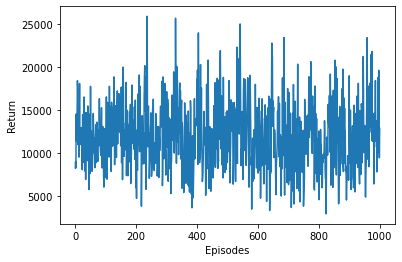

In [19]:
x_axis = np.arange(0,total_episodes)
plt.plot(x_axis,total_reward)
plt.xlabel('Episodes')
plt.ylabel('Return')

In [28]:
#Testing 
current_state = env.reset()
portfolio_value = []
total_reward1 = []
for step in range(max_steps):
    action = np.argmax(q_table1[f"{current_state}"])
    new_state, reward, done = env.step(action)
    current_state = new_state
    total_steps+= 1
    return_perc,return_value,bought,sold,current = env.reward_output()
    portfolio_value.append(return_value)
    if done == True:
        break
env.render()
total_reward1.append(return_value)

Current Porfolio Value:23308.778912926813; Available Capital: 1030.9709058878768; Current Stocks Held: 0.7709631929871194
No. Stocks Bought:14.936601367218918; No. Stocks Sold:14.165639264231796; Average Cost:21660.570896351892 
Return:133.08778912926812%; 13308.778912926813
Termination date: 2020-12-31 00:00:00


Text(0, 0.5, 'Portfolio Value')

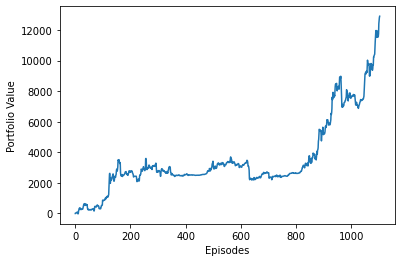

In [29]:
import matplotlib.pyplot as plt
x_axis = np.arange(0,1104)
plt.plot(x_axis,portfolio_value)
plt.xlabel('Episodes')
plt.ylabel('Portfolio Value')

ValueError: x and y must have same first dimension, but have shapes (1104,) and (1,)

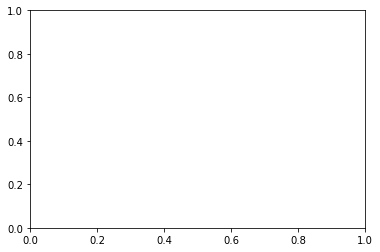

In [30]:
import matplotlib.pyplot as plt
x_axis = np.arange(0,1104)
plt.plot(x_axis,total_reward1)
plt.xlabel('Episodes')
plt.ylabel('Return')

In [ ]:
test["Close"][0]

In [ ]:
test["Close"][:-1]

In [ ]:
#Return From just passively Holding
28881.30/6204.85*100